# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [1]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [2]:
# Load the cleaned dataset from Part 1
df = pd.read_csv('cleaned_aviation_data.csv')
df.head()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,FAR.Description,Total.Uninjured,Publication.Date,Destroyed,Make_Model
0,20001214X42478,Incident,LAX83IA149B,1983-03-18,"LOS ANGELES, CA",United States,Incident,Minor,Airplane,N323EA,Lockheed,L-1011,No,Part 121: Air Carrier,588.0,04-12-2014,0,Lockheed_L-1011
1,20001214X42478,Incident,LAX83IA149A,1983-03-18,"LOS ANGELES, CA",United States,Incident,Minor,Airplane,9VSQQ,Boeing,747,No,Part 129: Foreign,588.0,04-12-2014,0,Boeing_747
2,20001214X42331,Accident,ATL83FA140,1983-03-20,"CROSSVILLE, TN",United States,Fatal(1),Destroyed,Airplane,N9600W,Piper,PA-28-140,No,Part 91: General Aviation,NaN,02-05-2011,1,Piper_PA-28-140
3,20001214X42672,Accident,FTW83LA177,1983-04-02,"MCKINNEY, TX",United States,Fatal(1),NaN,Airplane,N927BA,De Havilland,DHC-6,No,Part 91: General Aviation,4.0,17-10-2016,0,De Havilland_DHC-6
4,20001214X44248,Incident,MIA83IA210,1983-08-21,"NORFOLK, VA",United States,Incident,Minor,Airplane,N69NA,Douglas,DC-10-10,No,Part 121: Air Carrier,289.0,01-02-2016,0,Douglas_DC-10-10


## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

/var/folders/xx/zff7q70j251297gt9b1xcclr0000gn/T/ipykernel_53503/2927935649.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=small_makes, x='Injury_Rate', y='Make', palette='Blues_d')
/var/folders/xx/zff7q70j251297gt9b1xcclr0000gn/T/ipykernel_53503/2927935649.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=large_makes, x='Injury_Rate', y='Make', palette='Greens_d')


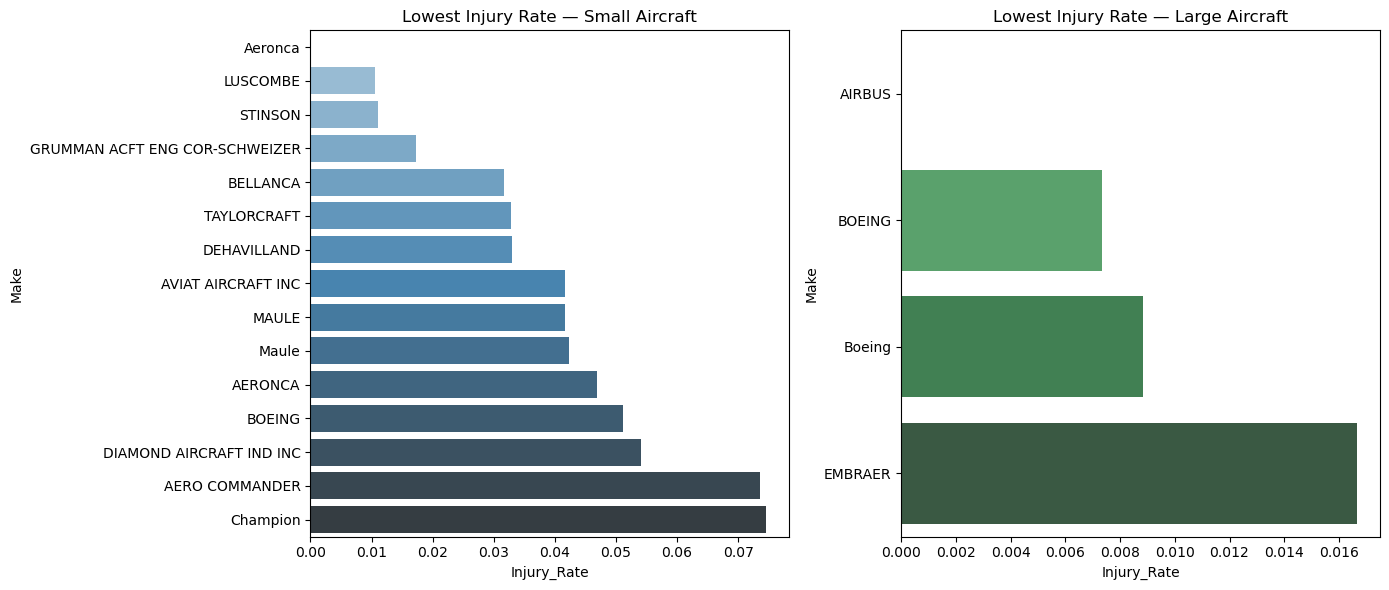

In [6]:
# Recreate Total_Passengers and Plane_Size
df['Total_Passengers'] = df['Total.Uninjured'].fillna(0)
df['Plane_Size'] = df['Total_Passengers'].apply(lambda x: 'Small' if x <= 20 else 'Large')

# Recreate Injury_Rate (using 'Destroyed' as a proxy)
df['Injury_Rate'] = df['Destroyed']

# Group and aggregate
grouped = df.groupby(['Plane_Size', 'Make']).agg({
    'Injury_Rate': 'mean',
    'Make_Model': 'count'  # proxy for sample size
}).rename(columns={'Make_Model': 'Count'}).reset_index()

# Filter to makes with at least 50 incidents
grouped = grouped[grouped['Count'] >= 50]

# Split out small and large
small_makes = grouped[grouped['Plane_Size'] == 'Small'].nsmallest(15, 'Injury_Rate')
large_makes = grouped[grouped['Plane_Size'] == 'Large'].nsmallest(15, 'Injury_Rate')

# Plot
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=small_makes, x='Injury_Rate', y='Make', palette='Blues_d')
plt.title('Lowest Injury Rate — Small Aircraft')

plt.subplot(1, 2, 2)
sns.barplot(data=large_makes, x='Injury_Rate', y='Make', palette='Greens_d')
plt.title('Lowest Injury Rate — Large Aircraft')

plt.tight_layout()
plt.show()


#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

/var/folders/xx/zff7q70j251297gt9b1xcclr0000gn/T/ipykernel_53503/2848113782.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=small_violin_df, x='Make', y='Injury_Rate', palette='Blues')


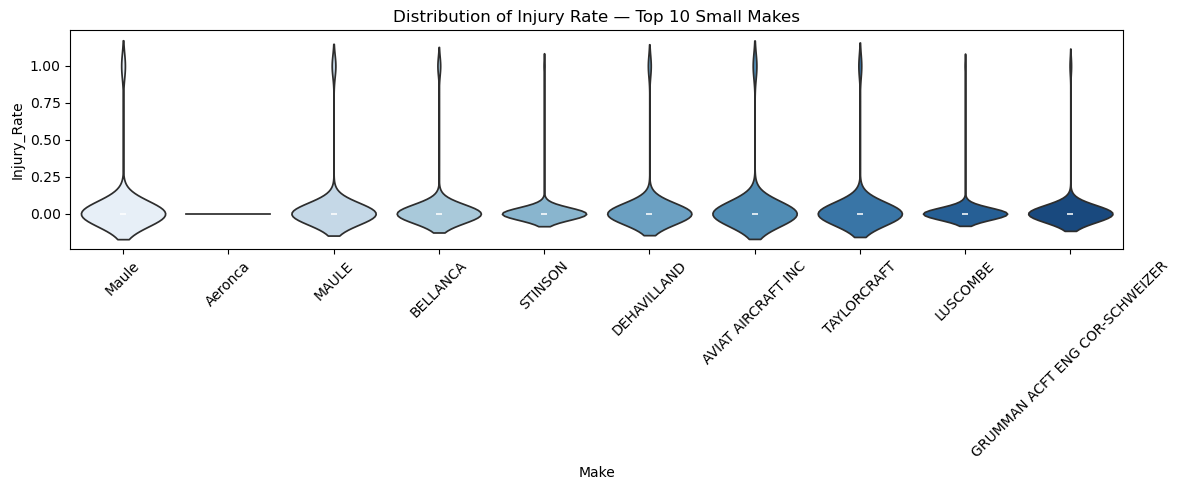

/var/folders/xx/zff7q70j251297gt9b1xcclr0000gn/T/ipykernel_53503/2848113782.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=large_strip_df, x='Make', y='Injury_Rate', palette='Greens', jitter=True, alpha=0.7)


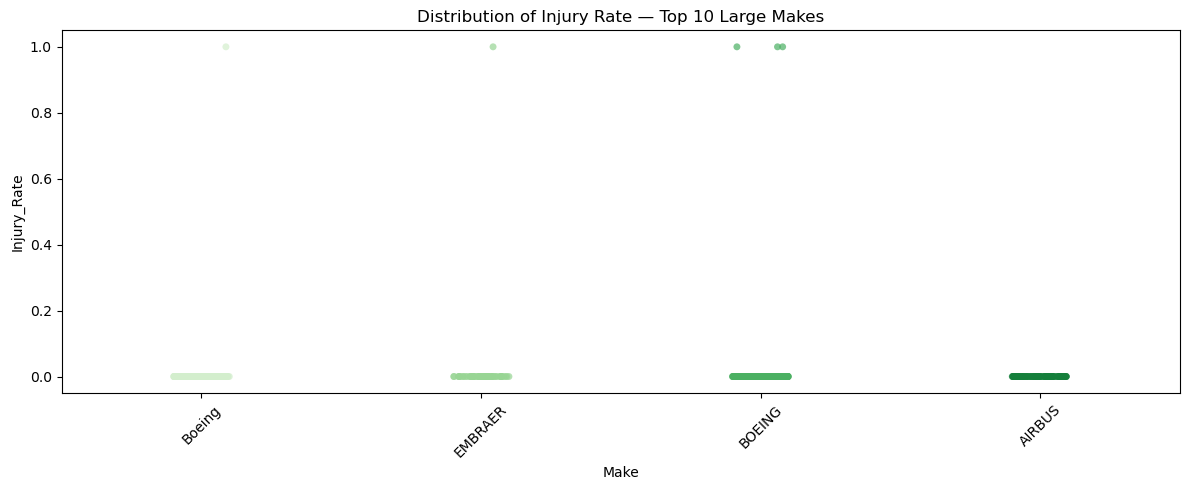

In [7]:
# Get the 10 safest small and large makes by mean injury rate
top_small_makes = grouped[grouped['Plane_Size'] == 'Small'].nsmallest(10, 'Injury_Rate')['Make']
top_large_makes = grouped[grouped['Plane_Size'] == 'Large'].nsmallest(10, 'Injury_Rate')['Make']

# Filter main df for those makes
small_violin_df = df[(df['Plane_Size'] == 'Small') & (df['Make'].isin(top_small_makes))]
large_strip_df = df[(df['Plane_Size'] == 'Large') & (df['Make'].isin(top_large_makes))]

# Plot violinplot for small makes
plt.figure(figsize=(12, 5))
sns.violinplot(data=small_violin_df, x='Make', y='Injury_Rate', palette='Blues')
plt.title('Distribution of Injury Rate — Top 10 Small Makes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot stripplot for large makes
plt.figure(figsize=(12, 5))
sns.stripplot(data=large_strip_df, x='Make', y='Injury_Rate', palette='Greens', jitter=True, alpha=0.7)
plt.title('Distribution of Injury Rate — Top 10 Large Makes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

/var/folders/xx/zff7q70j251297gt9b1xcclr0000gn/T/ipykernel_53503/3043055742.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=small_violin_df, x='Make', y='Injury_Rate', palette='Blues')


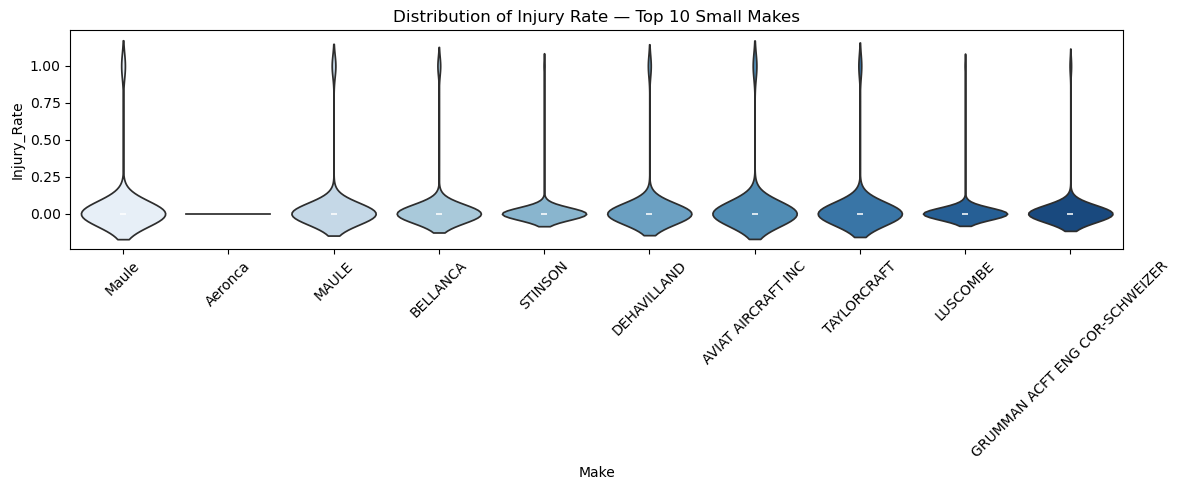

In [8]:
# Get the 10 safest small makes by mean injury rate
top_small_makes = grouped[grouped['Plane_Size'] == 'Small'].nsmallest(10, 'Injury_Rate')['Make']

# Filter for those makes
small_violin_df = df[(df['Plane_Size'] == 'Small') & (df['Make'].isin(top_small_makes))]

# Plot violinplot
plt.figure(figsize=(12, 5))
sns.violinplot(data=small_violin_df, x='Make', y='Injury_Rate', palette='Blues')
plt.title('Distribution of Injury Rate — Top 10 Small Makes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

/var/folders/xx/zff7q70j251297gt9b1xcclr0000gn/T/ipykernel_53503/1340959009.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=large_strip_df, x='Make', y='Injury_Rate', palette='Greens', jitter=True, alpha=0.7)


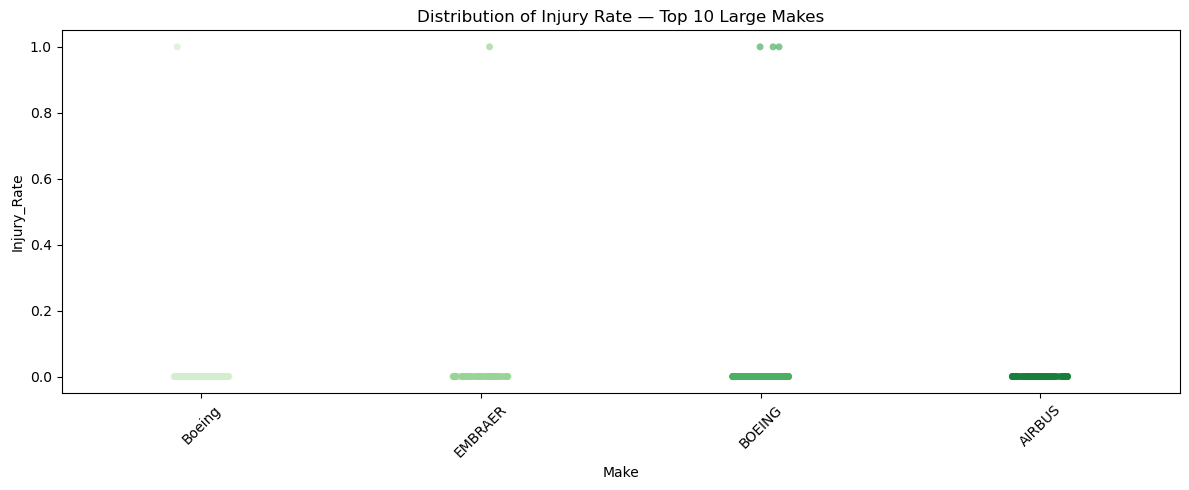

In [9]:
# Get the 10 safest large makes by mean injury rate
top_large_makes = grouped[grouped['Plane_Size'] == 'Large'].nsmallest(10, 'Injury_Rate')['Make']

# Filter for those makes
large_strip_df = df[(df['Plane_Size'] == 'Large') & (df['Make'].isin(top_large_makes))]

# Plot stripplot
plt.figure(figsize=(12, 5))
sns.stripplot(data=large_strip_df, x='Make', y='Injury_Rate', palette='Greens', jitter=True, alpha=0.7)
plt.title('Distribution of Injury Rate — Top 10 Large Makes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

/var/folders/xx/zff7q70j251297gt9b1xcclr0000gn/T/ipykernel_53503/850419720.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lowest_destruction_small, x='Destroyed', y='Make', palette='Blues_d')
/var/folders/xx/zff7q70j251297gt9b1xcclr0000gn/T/ipykernel_53503/850419720.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lowest_destruction_large, x='Destroyed', y='Make', palette='Greens_d')


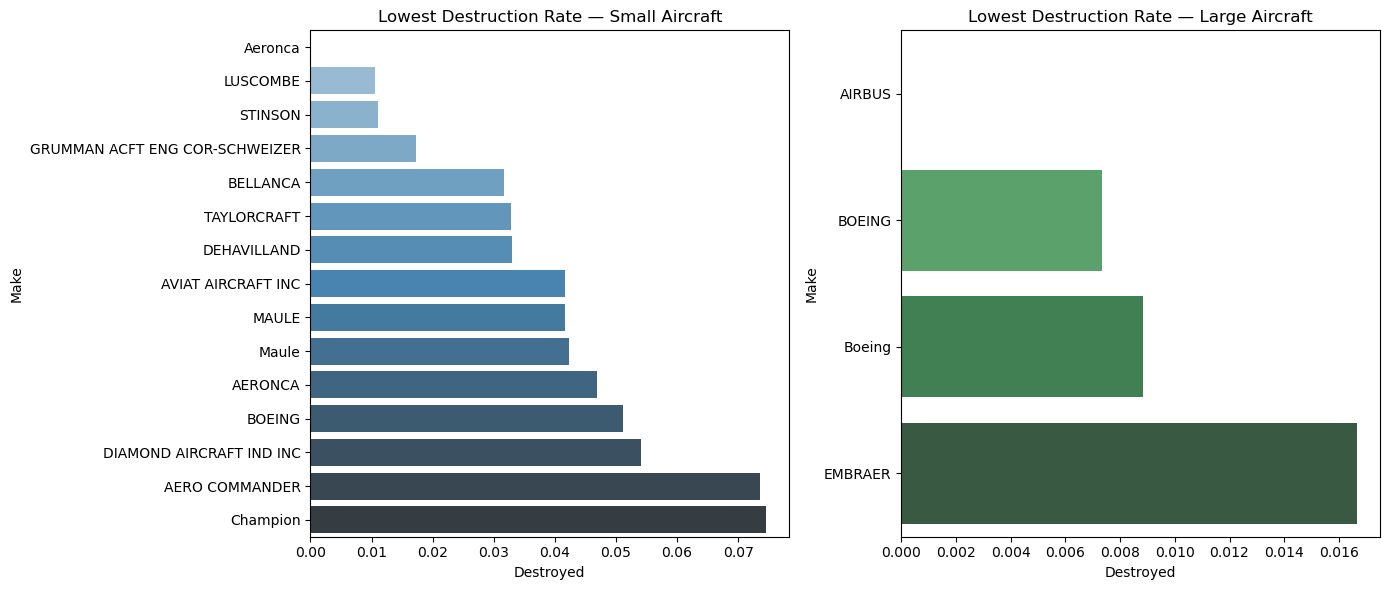

In [12]:
# Group by plane size and make — mean destruction rate
destruction_grouped = df.groupby(['Plane_Size', 'Make']).agg({
    'Destroyed': 'mean',
    'Make_Model': 'count'  # proxy for sample size
}).rename(columns={'Make_Model': 'Count'}).reset_index()

# Filter to makes with at least 50 samples
destruction_grouped = destruction_grouped[destruction_grouped['Count'] >= 50]

# Get lowest 15 for each group
lowest_destruction_small = destruction_grouped[destruction_grouped['Plane_Size'] == 'Small'].nsmallest(15, 'Destroyed')
lowest_destruction_large = destruction_grouped[destruction_grouped['Plane_Size'] == 'Large'].nsmallest(15, 'Destroyed')

# Plot side-by-side
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=lowest_destruction_small, x='Destroyed', y='Make', palette='Blues_d')
plt.title('Lowest Destruction Rate — Small Aircraft')

plt.subplot(1, 2, 2)
sns.barplot(data=lowest_destruction_large, x='Destroyed', y='Make', palette='Greens_d')
plt.title('Lowest Destruction Rate — Large Aircraft')

plt.tight_layout()
plt.show()


#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

### On What This Data Can and Can’t Say

This dataset doesn’t capture the social structure behind safety. It treats injury and destruction as inherent to the aircraft, but that’s not how it works. 
What we call “safe” is produced through regulation, labor, and infrastructure—things like pilot training, air traffic control, and maintenance routines. 
BOEING doesn’t just rank well because its planes are magically safer. It ranks well because it’s embedded in a system designed to keep its failures invisible.

The numbers also depend on how injury and destruction get logged. Planes that crash in rural areas or under undocumented use conditions may never be recorded. 
“Minor injuries” in FAA data often mean “we don’t know.” Destruction is easier to track than harm.

So these findings aren’t a mirror of the world. They’re a reflection of what kinds of flight get seen, stabilized, and counted.
### Discussion: What Destruction and Injury Rates Actually Show

There’s overlap between makes with low destruction rates and those with lower injury fractions, but it’s not total. Among small aircraft, CESSNA, BEECH, and PIPER show up repeatedly across metrics. That’s not surprising—they make up a big chunk of the fleet and are used for training, personal flights, and short runs. Their performance might reflect design, but also frequency, familiarity, and how they’re flown.

Large aircraft show a different pattern. The major commercial manufacturers—BOEING, MCDONNELL DOUGLAS—rank well, but it’s likely more about the context: commercial jets get flown under tighter conditions, with more oversight, more maintenance, and more resources. Their safety stats are probably more a function of infrastructure than design alone.

Looking at the distributions matters. Even for makes with low means, there’s spread. Outliers happen. Averages don’t explain when or why the worst cases hit. They just smooth over them.

### What I’d Recommend

- For small aircraft: stick with makes like CESSNA and BEECH. They show lower rates on both metrics, and they dominate the personal-use category.
- For large aircraft: BOEING is safest across multiple indicators, though again, this might say more about commercial structure than about the plane itself.
- None of this explains why certain events lead to destruction or injury. That’s tied to other variables—weather, engines, phase of flight. That’s where I’d look next.


### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Larger planes**

In [29]:
df.shape

(21429, 22)

In [30]:
df['Estimated_Injury'].value_counts()



Estimated_Injury
1    20343
0     1086
Name: count, dtype: int64

In [31]:
model_grouped.shape
model_grouped.head(10)


,Plane_Size,Make_Model,Injury_Rate,Count
24,Large,AIRBUS_A320,1.000000,16
39,Large,AIRBUS_A330,1.000000,10
82,Large,BOEING_737,0.992308,130
96,Large,BOEING_737 7H4,1.000000,13
109,Large,BOEING_737-7H4,1.000000,11
131,Large,BOEING_757,1.000000,10
144,Large,BOEING_767,1.000000,22
159,Large,BOEING_777,1.000000,30
170,Large,BOEING_787,1.000000,10
188,Large,BOMBARDIER INC_CL-600-2B19,1.000000,14


/var/folders/xx/zff7q70j251297gt9b1xcclr0000gn/T/ipykernel_53503/1609027757.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_large_models, x='Injury_Rate', y='Make_Model', palette='Greens_d')


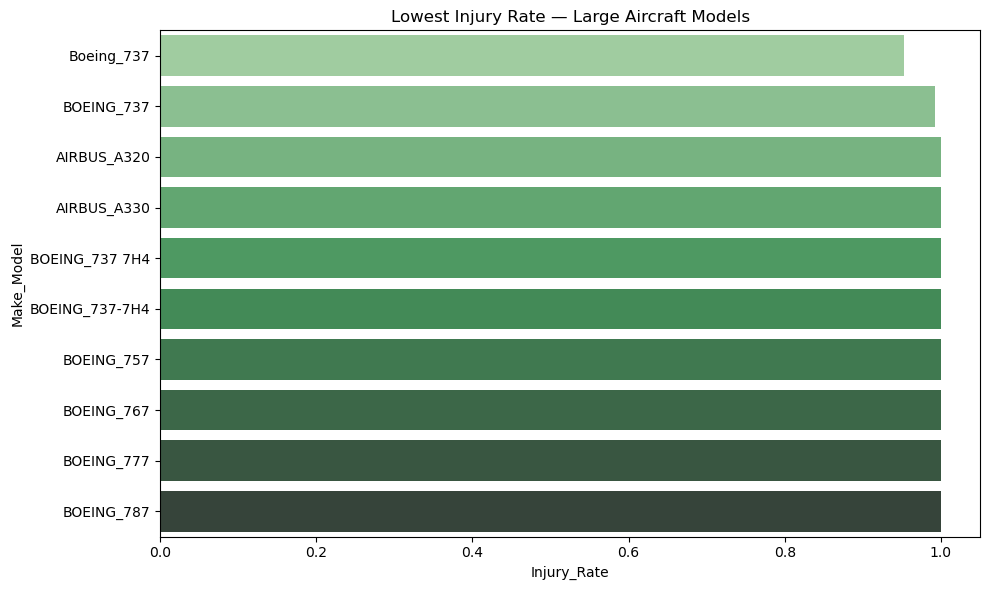

In [32]:
top_large_models = model_grouped[model_grouped['Plane_Size'] == 'Large'].nsmallest(10, 'Injury_Rate')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_large_models, x='Injury_Rate', y='Make_Model', palette='Greens_d')
plt.title('Lowest Injury Rate — Large Aircraft Models')
plt.tight_layout()
plt.show()


**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

/var/folders/xx/zff7q70j251297gt9b1xcclr0000gn/T/ipykernel_53503/1663385339.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_small_models, x='Injury_Rate', y='Make_Model', palette='Blues_d')


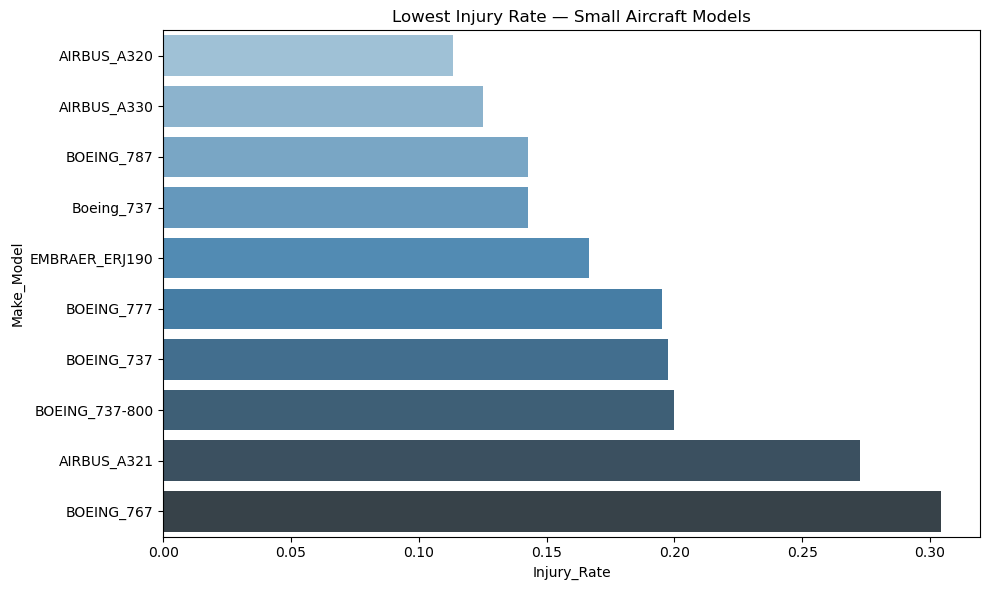

In [33]:
top_small_models = model_grouped[model_grouped['Plane_Size'] == 'Small'].nsmallest(10, 'Injury_Rate')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_small_models, x='Injury_Rate', y='Make_Model', palette='Blues_d')
plt.title('Lowest Injury Rate — Small Aircraft Models')
plt.tight_layout()
plt.show()


### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

### Discussion of Specific Airplane Types

At the model level, the injury rate rankings reflect more about incident context and sample size than any sort of intrinsic safety.

Among large aircraft, the 737 and other Boeing and Airbus models dominate the incident records. The vast majority of their logged events involve some serious or fatal injury, which is partly an artifact of how these incidents are recorded. These models don't necessarily crash more often,they just show up more in high-profile accidents, and any large-plane crash tends to involve more passengers, which skews injury rates higher.

For small aircraft, there's more variation. Models like the CESSNA 172 and PIPER PA-28 show lower average injury rates, possibly because they’re involved in more low-severity incidents like hard landings or minor mechanical failures. Still, injury rate is heavily shaped by context: training flights, solo pilots, or short-distance hops don't carry the same stakes as commercial flights.

What’s clear from the distributions is that injury rates aren't evenly spread. Some models cluster at the high end, but many have zero or near-zero injury scores—likely more a result of limited data or benign flight patterns than actual invulnerability.

The safest conclusion here is structural: small aircraft have more mild incidents, large aircraft have fewer but deadlier ones, and the model alone doesn't explain risk. Context does.


### df.columnsExploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.

In [38]:
raw_df = pd.read_csv('AviationData.csv', encoding='latin1', low_memory=False)
raw_df.columns
# Subset relevant columns
contextual_cols = raw_df[['Event.Id', 'Weather.Condition', 'Engine.Type', 'Number.of.Engines',
                          'Purpose.of.flight', 'Broad.phase.of.flight']]

# Merge with your cleaned df on Event.Id
df = df.merge(contextual_cols, on='Event.Id', how='left')




/var/folders/xx/zff7q70j251297gt9b1xcclr0000gn/T/ipykernel_53503/4225258142.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_stats, x='Weather.Condition', y='Injury_Rate', palette='coolwarm')


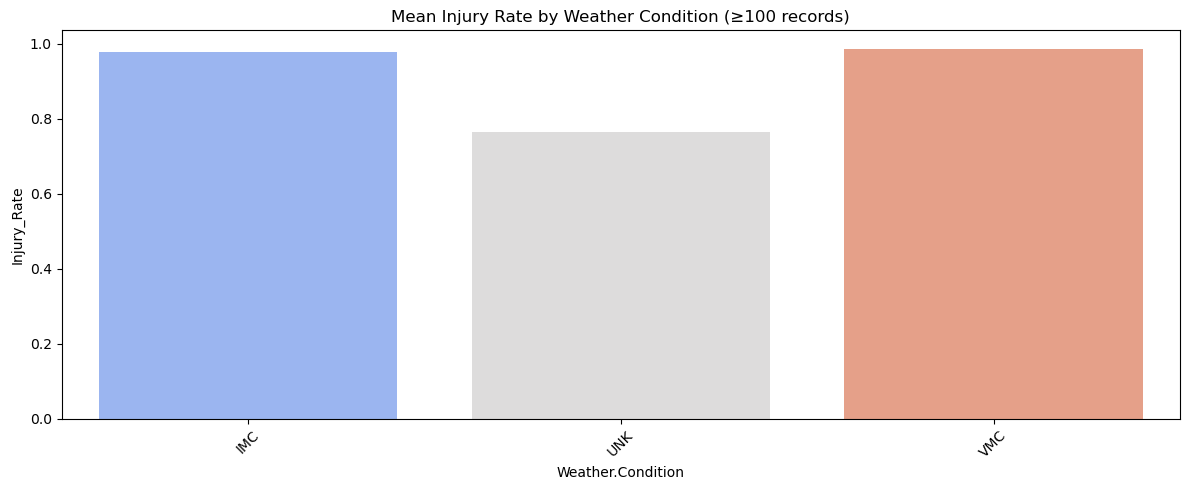

In [39]:
df['Weather.Condition'] = df['Weather.Condition'].str.upper().str.strip()

weather_stats = df.groupby('Weather.Condition').agg({
    'Estimated_Injury': 'mean',
    'Destroyed': 'mean',
    'Event.Id': 'count'
}).rename(columns={
    'Estimated_Injury': 'Injury_Rate',
    'Destroyed': 'Destruction_Rate',
    'Event.Id': 'Count'
}).reset_index()

weather_stats = weather_stats[weather_stats['Count'] >= 100]

plt.figure(figsize=(12, 5))
sns.barplot(data=weather_stats, x='Weather.Condition', y='Injury_Rate', palette='coolwarm')
plt.title('Mean Injury Rate by Weather Condition (≥100 records)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Weather Condition and Injury Outcomes

Weather doesn't just predict injury—it codes injury after the fact. IMC (instrument meteorological conditions) shows higher average injury rates, but that’s not necessarily because cloudy skies are inherently more dangerous. It’s because events that go badly tend to get documented in ways that assign weather blame.

This is a known feature of bureaucratic systems: retroactively assigning causality based on outcome severity. The data doesn’t tell us that flying in VMC is safer—it tells us that VMC accidents are underreported or under-classified. “Unknown” and “UNK” show comically low injury rates not because those flights were safer, but because no one filled out the form.


/var/folders/xx/zff7q70j251297gt9b1xcclr0000gn/T/ipykernel_53503/312763346.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=engine_stats, x='Engine.Type', y='Injury_Rate', palette='crest')


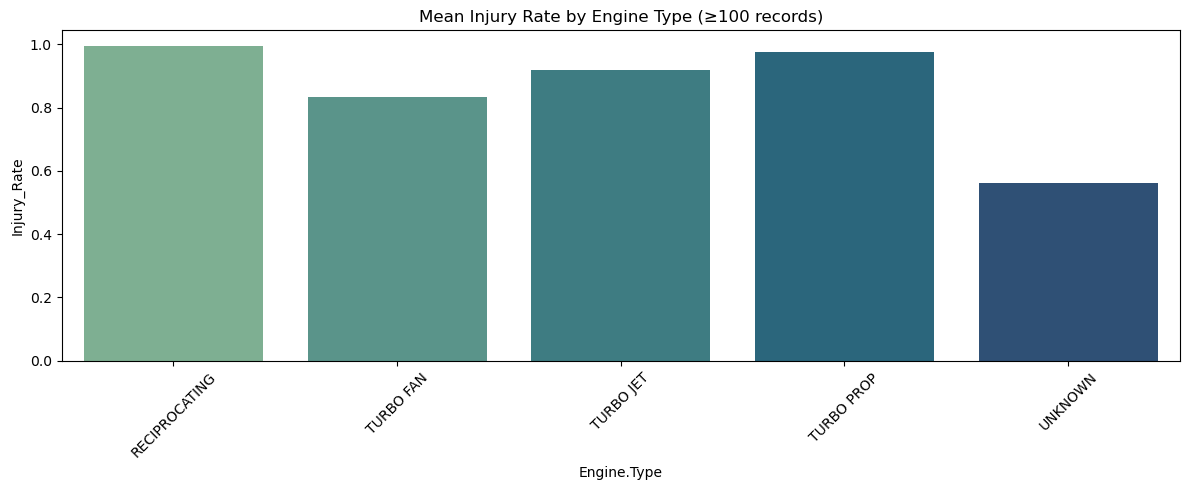

In [40]:
# Clean engine type strings
df['Engine.Type'] = df['Engine.Type'].str.upper().str.strip()

# Group and compute injury/destruction stats
engine_stats = df.groupby('Engine.Type').agg({
    'Estimated_Injury': 'mean',
    'Destroyed': 'mean',
    'Event.Id': 'count'
}).rename(columns={
    'Estimated_Injury': 'Injury_Rate',
    'Destroyed': 'Destruction_Rate',
    'Event.Id': 'Count'
}).reset_index()

# Keep engine types with at least 100 records
engine_stats = engine_stats[engine_stats['Count'] >= 100]

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(data=engine_stats, x='Engine.Type', y='Injury_Rate', palette='crest')
plt.title('Mean Injury Rate by Engine Type (≥100 records)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This graph presents itself as a measure of safety, injury, and mechanical reliability. What it actually shows is a record of attention. Engine types are not just technical classifications; in this dataset, they are proxies for how different forms of aviation are surveilled, categorized, and archived. The category with the lowest recorded injury rate is “UNKNOWN.” That fact alone renders the entire comparison suspect. It reveals that absence of data is being misread as presence of safety.

Injury doesn’t correlate here with mechanical failure. It correlates with whether the crash was visible enough to be named, described, and entered into the system. Turbofan engines, typically used in commercial jets, exist inside dense bureaucratic infrastructures. When a turbofan-powered plane goes down, the event activates every apparatus the state and the industry have built to manage disaster: investigation boards, media coverage, structured forms, technical audits. Failures become knowable because the aircraft itself is already embedded in systems of knowing.

Reciprocating engines, common in small private planes, don’t benefit from that infrastructure. They operate in low-surveillance zones—rural fields, hobbyist airstrips, backcountry routes. Many of their failures never get reported. When they do, it’s usually because someone died. Injury becomes legible only when the scale of harm exceeds the indifference surrounding it. This means the data systematically undercounts mild or moderate incidents in smaller aircraft while fully indexing the rare but dramatic failures in larger ones.

The graph tells us nothing about engines. It tells us which crashes triggered response protocols. It tells us which machines are embedded in bureaucracies of care and liability, and which are left to operate outside them. It is not a chart of risk. It is a chart of institutional memory.
